In [164]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
from pandas_datareader import data as pdr
import yfinance as yf

In [261]:
yf.pdr_override() # <== that's all it takes :-)
stock = pdr.get_data_yahoo('MDB', 
                          start=datetime.datetime(2017, 10, 1), 
                          end=datetime.datetime(2019, 3, 1))
stock.head()

[*********************100%***********************]  1 of 1 downloaded


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-10-19,33.00,34.00,29.10,32.07,32.07,11508500
2017-10-20,33.37,33.37,30.10,30.68,30.68,2358700
2017-10-23,30.51,31.33,30.19,30.50,30.50,749400
2017-10-24,30.46,30.92,30.44,30.57,30.57,420700
2017-10-25,30.50,31.10,29.88,31.00,31.00,1219400


In [262]:
# Inspect the index 
stock.index

# Inspect the columns
stock.columns

# Select only the last 10 observations of `Close`
ts = stock['Close'][-10:]

# Check the type of `ts` 
type(ts)

pandas.core.series.Series

In [263]:
# Inspect the first rows of November-December 18
print(stock.loc[pd.Timestamp('2018-11-01'):pd.Timestamp('2018-12-31')].head())

# Inspect the first rows of 2019 
print(stock.loc['2019'].head())


             Open   High    Low  Close  Adj Close   Volume
Date                                                      
2018-11-01  81.50  81.99  77.63  80.91      80.91  1068100
2018-11-02  80.50  81.22  79.24  79.69      79.69   781600
2018-11-05  79.56  79.56  75.90  78.13      78.13   730400
2018-11-06  77.96  80.00  75.64  76.06      76.06   672400
2018-11-07  78.89  84.03  78.00  82.10      82.10  1500800
             Open   High    Low  Close  Adj Close   Volume
Date                                                      
2019-01-02  81.40  82.58  78.11  79.95      79.95  1325100
2019-01-03  77.70  79.50  75.00  75.89      75.89  1157800
2019-01-04  77.85  83.89  77.29  81.73      81.73  1214700
2019-01-07  83.05  89.20  82.75  85.70      85.70  1158900
2019-01-08  88.00  90.59  85.08  89.99      89.99  1414200


In [264]:
# Sample 20 rows
sample = stock.sample(20)

# Print `sample`
print(sample)

# Resample to monthly level 
monthly_stock = stock.resample('M')

# Print `monthly_aapl`
print(monthly_stock)

              Open    High     Low   Close  Adj Close   Volume
Date                                                          
2019-02-13  101.38  101.80   97.87   98.29      98.29   649600
2019-02-28  100.47  104.28  100.15  101.56     101.56   843400
2019-01-09   89.10   89.50   84.36   86.62      86.62  1964700
2018-03-05   35.99   37.33   35.03   36.01      36.01   875600
2017-10-25   30.50   31.10   29.88   31.00      31.00  1219400
2018-12-03   86.00   86.18   82.67   84.98      84.98  2137500
2018-02-23   30.36   31.64   30.00   31.62      31.62   149300
2018-02-27   30.95   31.50   30.36   31.40      31.40   195100
2018-07-30   59.76   59.80   53.81   55.49      55.49  1504800
2018-09-11   82.44   85.25   81.67   84.77      84.77  1294800
2018-12-14   87.43   91.19   86.05   90.58      90.58   864600
2018-01-11   28.81   29.86   28.80   29.61      29.61   219000
2018-11-05   79.56   79.56   75.90   78.13      78.13   730400
2018-03-07   34.35   38.36   33.75   38.02      38.02  

In [266]:
# Add a column `diff` to `MDB` 
stock['diff'] = stock.Open - stock.Close

# Delete the new `diff` column
del stock['diff']

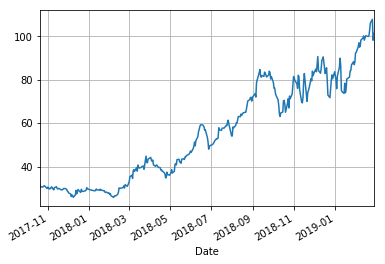

In [267]:
# Import Matplotlib's `pyplot` module as `plt`
import matplotlib.pyplot as plt

# Plot the closing prices for `aapl`
stock['Close'].plot(grid=True)

# Show the plot
plt.show()

# Common Financial Analysis

## Returns

In [268]:
# Assign `Adj Close` to `daily_close`
daily_close = stock[['Adj Close']]

# Daily returns
daily_pct_c = daily_close.pct_change()

# Replace NA values with 0
daily_pct_c.fillna(0, inplace=True)

# Inspect daily returns
print(daily_pct_c)

# Daily log returns
daily_log_returns = np.log(daily_close.pct_change()+1)

# Print daily log returns
print(daily_log_returns)

            Adj Close
Date                 
2017-10-19   0.000000
2017-10-20  -0.043343
2017-10-23  -0.005867
2017-10-24   0.002295
2017-10-25   0.014066
2017-10-26   0.003226
2017-10-27  -0.006752
2017-10-30  -0.033668
2017-10-31   0.021106
2017-11-01  -0.022310
2017-11-02   0.005034
2017-11-03  -0.010684
2017-11-06   0.033075
2017-11-07  -0.026135
2017-11-08   0.002348
2017-11-09  -0.022088
2017-11-10   0.033539
2017-11-13   0.015894
2017-11-14  -0.026076
2017-11-15  -0.008367
2017-11-16   0.008100
2017-11-17  -0.001339
2017-11-20  -0.019108
2017-11-21  -0.001709
2017-11-22   0.002396
2017-11-24   0.021858
2017-11-27  -0.007687
2017-11-28  -0.004715
2017-11-29  -0.028426
2017-11-30  -0.006270
...               ...
2019-01-16  -0.055485
2019-01-17   0.020932
2019-01-18   0.062698
2019-01-22   0.011078
2019-01-23   0.035209
2019-01-24   0.002141
2019-01-25   0.031209
2019-01-28   0.017146
2019-01-29  -0.015839
2019-01-30   0.013795
2019-01-31   0.047284
2019-02-01   0.003356
2019-02-04

In [269]:
# Resample `stock` to business months, take last observation as value 
monthly = stock.resample('BM').apply(lambda x: x[-1])

# Calculate the monthly percentage change
monthly.pct_change()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-10-31,NaN,NaN,NaN,NaN,NaN,NaN
2017-11-30,-0.033557,-0.053781,-0.046644,-0.063976,-0.063976,-0.377240
2017-12-29,0.053819,0.046848,0.039071,0.040308,0.040308,0.638566
2018-01-31,-0.077759,-0.078644,-0.092818,-0.086590,-0.086590,-0.277572
2018-02-28,0.125402,0.169643,0.135176,0.188122,0.188122,1.338593
2018-03-30,0.327937,0.334962,0.375987,0.347408,0.347408,0.113603
2018-04-30,-0.127421,-0.149817,-0.150371,-0.170737,-0.170737,0.133290
2018-05-31,0.273151,0.274953,0.282780,0.309530,0.309530,-0.068198
2018-06-29,0.071229,0.067103,0.070191,0.053045,0.053045,0.154287


In [270]:
# Resample `stock` to quarters, take the mean as value per quarter
quarter = stock.resample("4M").mean()

# Calculate the quarterly percentage change
quarter.pct_change()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-10-31,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-28,-0.077013,-0.073219,-0.057695,-0.063349,-0.063349,-0.880999
2018-06-30,0.504556,0.517098,0.493958,0.506028,0.506028,2.757388
2018-10-31,0.556290,0.551453,0.561244,0.561105,0.561105,0.022497
2019-02-28,0.259667,0.270124,0.253710,0.258599,0.258599,0.348690


In [271]:
# Daily returns
daily_pct_c = daily_close / daily_close.shift(1) - 1

# Print `daily_pct_c`
print(daily_pct_c)


            Adj Close
Date                 
2017-10-19        NaN
2017-10-20  -0.043343
2017-10-23  -0.005867
2017-10-24   0.002295
2017-10-25   0.014066
2017-10-26   0.003226
2017-10-27  -0.006752
2017-10-30  -0.033668
2017-10-31   0.021106
2017-11-01  -0.022310
2017-11-02   0.005034
2017-11-03  -0.010684
2017-11-06   0.033075
2017-11-07  -0.026135
2017-11-08   0.002348
2017-11-09  -0.022088
2017-11-10   0.033539
2017-11-13   0.015894
2017-11-14  -0.026076
2017-11-15  -0.008367
2017-11-16   0.008100
2017-11-17  -0.001339
2017-11-20  -0.019108
2017-11-21  -0.001709
2017-11-22   0.002396
2017-11-24   0.021858
2017-11-27  -0.007687
2017-11-28  -0.004715
2017-11-29  -0.028426
2017-11-30  -0.006270
...               ...
2019-01-16  -0.055485
2019-01-17   0.020932
2019-01-18   0.062698
2019-01-22   0.011078
2019-01-23   0.035209
2019-01-24   0.002141
2019-01-25   0.031209
2019-01-28   0.017146
2019-01-29  -0.015839
2019-01-30   0.013795
2019-01-31   0.047284
2019-02-01   0.003356
2019-02-04

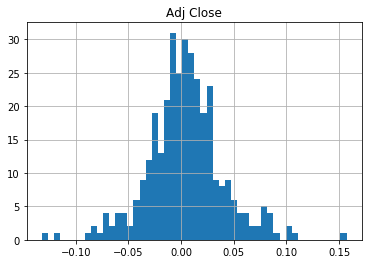

        Adj Close
count  340.000000
mean     0.004028
std      0.035691
min     -0.131840
25%     -0.015830
50%      0.002868
75%      0.022471
max      0.157025


In [272]:
# Import matplotlib
import matplotlib.pyplot as plt

# Plot the distribution of `daily_pct_c`
daily_pct_c.hist(bins=50)

# Show the plot
plt.show()

# Pull up summary statistics
print(daily_pct_c.describe())


In [273]:
# Calculate the cumulative daily returns
cum_daily_return = (1 + daily_pct_c).cumprod()

# Print `cum_daily_return`
print(cum_daily_return)

            Adj Close
Date                 
2017-10-19        NaN
2017-10-20   0.956657
2017-10-23   0.951045
2017-10-24   0.953227
2017-10-25   0.966635
2017-10-26   0.969754
2017-10-27   0.963205
2017-10-30   0.930776
2017-10-31   0.950421
2017-11-01   0.929217
2017-11-02   0.933895
2017-11-03   0.923916
2017-11-06   0.954475
2017-11-07   0.929529
2017-11-08   0.931712
2017-11-09   0.911132
2017-11-10   0.941690
2017-11-13   0.956657
2017-11-14   0.931712
2017-11-15   0.923916
2017-11-16   0.931400
2017-11-17   0.930153
2017-11-20   0.912379
2017-11-21   0.910820
2017-11-22   0.913003
2017-11-24   0.932959
2017-11-27   0.925787
2017-11-28   0.921422
2017-11-29   0.895229
2017-11-30   0.889616
...               ...
2019-01-16   2.309012
2019-01-17   2.357343
2019-01-18   2.505145
2019-01-22   2.532897
2019-01-23   2.622077
2019-01-24   2.627689
2019-01-25   2.709698
2019-01-28   2.756158
2019-01-29   2.712504
2019-01-30   2.749922
2019-01-31   2.879950
2019-02-01   2.889616
2019-02-04

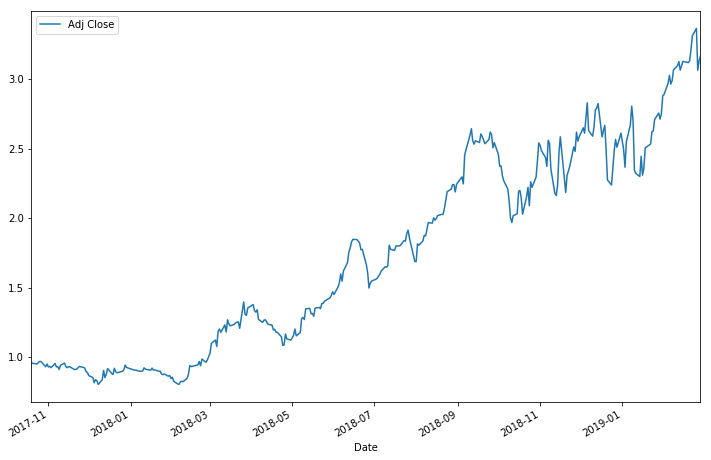

In [274]:
# Import matplotlib
import matplotlib.pyplot as plt 

# Plot the cumulative daily returns
cum_daily_return.plot(figsize=(12,8))

# Show the plot
plt.show()

In [275]:
# Resample the cumulative daily return to cumulative monthly return 
cum_monthly_return = cum_daily_return.resample("M").mean()

# Print the `cum_monthly_return`
print(cum_monthly_return)

            Adj Close
Date                 
2017-10-31   0.955215
2017-11-30   0.925268
2017-12-31   0.876395
2018-01-31   0.895779
2018-02-28   0.898873
2018-03-31   1.218495
2018-04-30   1.221049
2018-05-31   1.311506
2018-06-30   1.668864
2018-07-31   1.742542
2018-08-31   2.013679
2018-09-30   2.528400
2018-10-31   2.212890
2018-11-30   2.418935
2018-12-31   2.600791
2019-01-31   2.560040
2019-02-28   3.101456


In [276]:
yf.pdr_override() # <== that's all it takes :-)



stock_data = yf.download("SPY AAPL MDB", start="2017-10-01", end="2019-03-01",
                   group_by="ticker")

[*********************100%***********************]  3 of 3 downloaded


In [277]:
stock_data.columns

MultiIndex(levels=[['MDB', 'SPY', 'AAPL'], ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']],
           codes=[[0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2], [0, 1, 2, 3, 4, 5, 0, 1, 2, 3, 4, 5, 0, 1, 2, 3, 4, 5]])

In [278]:
stock_data.head()

MDB                                     SPY                  \
           Open High Low Close Adj Close Volume    Open    High     Low   
Date                                                                      
2017-10-02  NaN  NaN NaN   NaN       NaN    NaN  251.49  252.32  251.29   
2017-10-03  NaN  NaN NaN   NaN       NaN    NaN  252.32  252.89  252.23   
2017-10-04  NaN  NaN NaN   NaN       NaN    NaN  252.69  253.44  252.56   
2017-10-05  NaN  NaN NaN   NaN       NaN    NaN  253.54  254.68  253.20   
2017-10-06  NaN  NaN NaN   NaN       NaN    NaN  254.15  254.70  253.85   

                                          AAPL                          \
             Close Adj Close    Volume    Open    High     Low   Close   
Date                                                                     
2017-10-02  252.32    245.28  59023000  154.26  154.45  152.72  153.81   
2017-10-03  252.86    245.80  66810200  154.01  155.09  153.91  154.48   
2017-10-04  253.16    246.09  55953600  153.63  153.86  152.46  153.48   
2017-10-05  254.66    247.55  63522800  154.18  155.44  154.05  155.39   
2017-10-06  254.37    247.27  80646000  154.97  155.49  154.56  155.30   

                                
           Adj Close    Volume  
Date                            
2017-10-02    149.77  18698800  
2017-10-03    150.42  16230300  
2017-10-04    149.45  20163800  
2017-10-05    151.31  21283800  
2017-10-06    151.22  17407600

In [279]:
stock_data = stock_data.reset_index()

stock_data.head()

Date  MDB                                     SPY                  \
             Open High Low Close Adj Close Volume    Open    High     Low   
0 2017-10-02  NaN  NaN NaN   NaN       NaN    NaN  251.49  252.32  251.29   
1 2017-10-03  NaN  NaN NaN   NaN       NaN    NaN  252.32  252.89  252.23   
2 2017-10-04  NaN  NaN NaN   NaN       NaN    NaN  252.69  253.44  252.56   
3 2017-10-05  NaN  NaN NaN   NaN       NaN    NaN  253.54  254.68  253.20   
4 2017-10-06  NaN  NaN NaN   NaN       NaN    NaN  254.15  254.70  253.85   

                                 AAPL                                    \
    Close Adj Close    Volume    Open    High     Low   Close Adj Close   
0  252.32    245.28  59023000  154.26  154.45  152.72  153.81    149.77   
1  252.86    245.80  66810200  154.01  155.09  153.91  154.48    150.42   
2  253.16    246.09  55953600  153.63  153.86  152.46  153.48    149.45   
3  254.66    247.55  63522800  154.18  155.44  154.05  155.39    151.31   
4  254.37    247.27  80646000  154.97  155.49  154.56  155.30    151.22   

             
     Volume  
0  18698800  
1  16230300  
2  20163800  
3  21283800  
4  17407600

In [280]:
print(list(stock_data.columns.levels[0]))
print(list(stock_data.columns.levels[1]))
stock_data.columns.levels[0]

['MDB', 'SPY', 'AAPL', 'Date']
['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', '']


Index(['MDB', 'SPY', 'AAPL', 'Date'], dtype='object')

In [281]:
index = stock_data.loc[:, stock_data.columns.get_level_values(1)==''].columns.tolist()
values = stock_data.loc[:, stock_data.columns.get_level_values(1)=='Adj Close'].columns.tolist()
stock_unpivot = stock_data.melt(id_vars=index, value_vars=values, 
                                var_name ='Stock', value_name ='Adj Close')

stock_unpivot.columns = ['Date', 'Ticker', 'Adj Close']

print(stock_unpivot)

           Date Ticker  Adj Close
0    2017-10-02    MDB        NaN
1    2017-10-03    MDB        NaN
2    2017-10-04    MDB        NaN
3    2017-10-05    MDB        NaN
4    2017-10-06    MDB        NaN
5    2017-10-09    MDB        NaN
6    2017-10-10    MDB        NaN
7    2017-10-11    MDB        NaN
8    2017-10-12    MDB        NaN
9    2017-10-13    MDB        NaN
10   2017-10-16    MDB        NaN
11   2017-10-17    MDB        NaN
12   2017-10-18    MDB        NaN
13   2017-10-19    MDB      32.07
14   2017-10-20    MDB      30.68
15   2017-10-23    MDB      30.50
16   2017-10-24    MDB      30.57
17   2017-10-25    MDB      31.00
18   2017-10-26    MDB      31.10
19   2017-10-27    MDB      30.89
20   2017-10-30    MDB      29.85
21   2017-10-31    MDB      30.48
22   2017-11-01    MDB      29.80
23   2017-11-02    MDB      29.95
24   2017-11-03    MDB      29.63
25   2017-11-06    MDB      30.61
26   2017-11-07    MDB      29.81
27   2017-11-08    MDB      29.88
28   2017-11-0

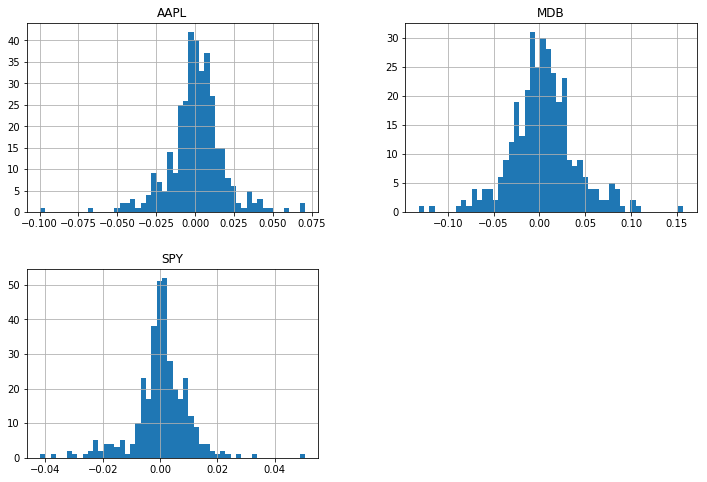

In [282]:
daily_close_px = stock_unpivot.reset_index()
daily_close_pivot = daily_close_px.pivot('Date', 'Ticker', 'Adj Close')

# Calculate the daily percentage change for `daily_close_px`
daily_pct_change = daily_close_pivot.pct_change()


# Plot the distributions
daily_pct_change.hist(bins=50, figsize=(12,8))

# Show the resulting plot
plt.show()

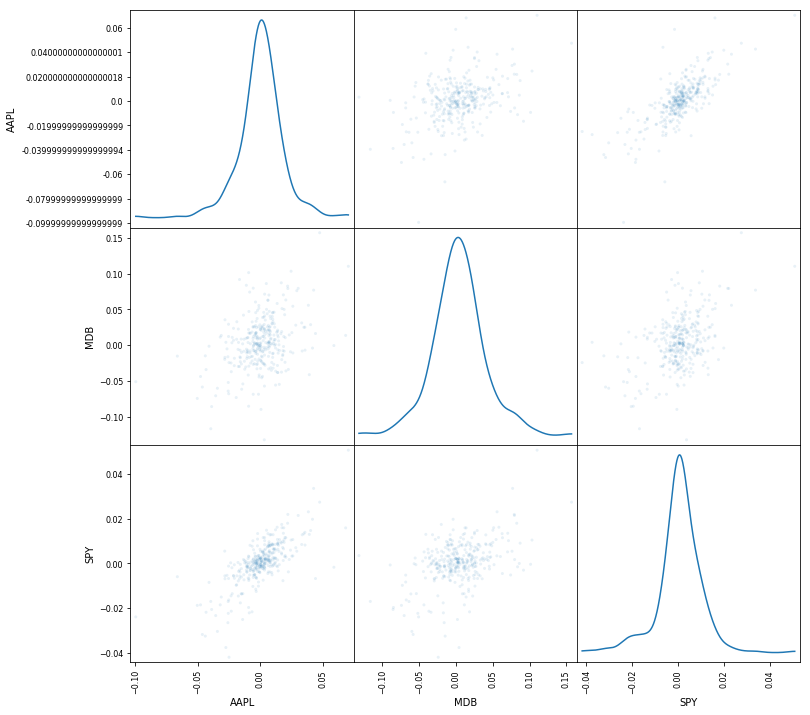

In [283]:
# Plot a scatter matrix with the `daily_pct_change` data 
pd.plotting.scatter_matrix(daily_pct_change, diagonal='kde', alpha=0.1,figsize=(12,12))

# Show the plot
plt.show()

## Moving Windows

In [284]:
mdb = stock_unpivot[stock_unpivot['Ticker'] == 'MDB']

# Isolate the adjusted closing prices 
adj_close_px = mdb['Adj Close']

# Calculate the moving average
moving_avg = adj_close_px.rolling(window=40).mean()

# Inspect the result
moving_avg[-10:]


344    85.40550
345    85.80325
346    86.16500
347    86.68300
348    87.43700
349    88.29775
350    89.00350
351    89.40300
352    89.90250
353    90.34800
Name: Adj Close, dtype: float64

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


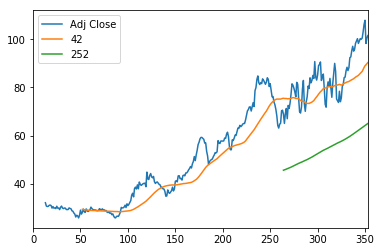

In [285]:
# Short moving window rolling mean
mdb['42'] = adj_close_px.rolling(window=40).mean()

# Long moving window rolling mean
mdb['252'] = adj_close_px.rolling(window=252).mean()

# Plot the adjusted closing price, the short and long windows of rolling means
mdb[['Adj Close', '42', '252']].plot()

plt.show()

## Volatility Calculation

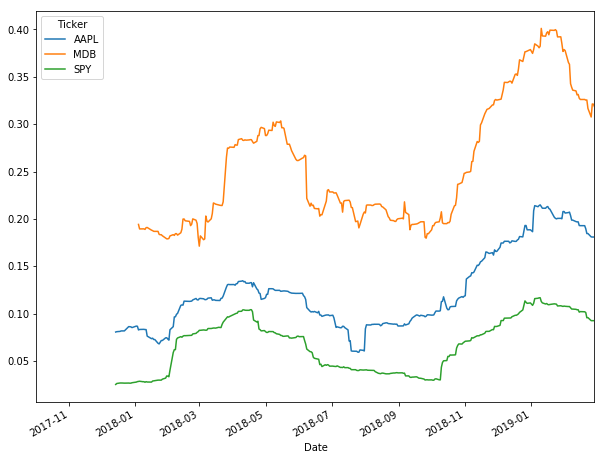

In [286]:
# Define the minumum of periods to consider 
min_periods = 52

# Calculate the volatility
vol = daily_pct_change.rolling(min_periods).std() * np.sqrt(min_periods) 

# Plot the volatility
vol.plot(figsize=(10, 8))

# Show the plot
plt.show()

## Ordinary Least-Squares Regression (OLS)

In [287]:
# Import the `api` model of `statsmodels` under alias `sm`
import statsmodels.api as sm
from pandas import tseries

In [288]:
# stock_unpivot.columns
all_returns_df = stock_unpivot.set_index(['Date', 'Ticker'])

# Calculate the returns, assume the Adj Close has been isolated
all_returns = np.log(all_returns_df / all_returns_df.shift(1))

# Isolate the MDB returns 
mdb_returns = all_returns.iloc[all_returns.index.get_level_values('Ticker') == 'MDB']
mdb_returns.index = mdb_returns.index.droplevel('Ticker')

# Isolate the AAPL returns 
aapl_returns = all_returns.iloc[all_returns.index.get_level_values('Ticker') == 'AAPL']
aapl_returns.index = aapl_returns.index.droplevel('Ticker')

# Isolate the SPY returns 
spy_returns = all_returns.iloc[all_returns.index.get_level_values('Ticker') == 'SPY']
spy_returns.index = spy_returns.index.droplevel('Ticker')


# Build up a new DataFrame with AAPL and MSFT returns
return_data = pd.concat([spy_returns, aapl_returns], axis=1)[1:]
return_data.columns = ['SPY', 'AAPL']

# Add a constant 
X = sm.add_constant(return_data['AAPL'])

# Construct the model
model = sm.OLS(return_data['SPY'],X).fit()

# Print the summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    SPY   R-squared:                       0.535
Model:                            OLS   Adj. R-squared:                  0.533
Method:                 Least Squares   F-statistic:                     403.4
Date:                Mon, 17 Jun 2019   Prob (F-statistic):           2.79e-60
Time:                        15:11:29   Log-Likelihood:                 1270.9
No. Observations:                 353   AIC:                            -2538.
Df Residuals:                     351   BIC:                            -2530.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0002      0.000      0.539      0.5

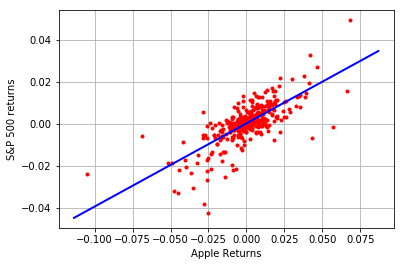

In [289]:
plt.plot(return_data['AAPL'], return_data['SPY'], 'r.')

ax = plt.axis()
x = np.linspace(ax[0], ax[1] + 0.01)

plt.plot(x, model.params[0] + model.params[1] * x, 'b', lw=2)

plt.grid(True)
plt.axis('tight')
plt.xlabel('Apple Returns')
plt.ylabel('S&P 500 returns')

plt.show()

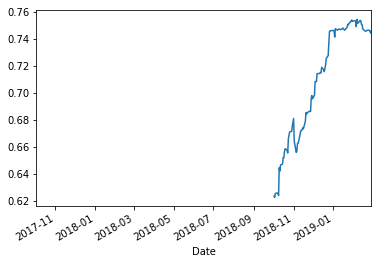

In [290]:
return_data['SPY'].rolling(window=252).corr(return_data['AAPL']).plot()
plt.show()

## Building A Trading Strategy With Python 

In [302]:
# Initialize the short and long windows
short_window = 40
long_window = 100

# Initialize the `signals` DataFrame with the `signal` column
signals = pd.DataFrame(index=stock.index)
signals['signal'] = 0.0

# Create short simple moving average over the short window
signals['short_mavg'] = stock['Close'].rolling(window=short_window, min_periods=1, center=False).mean()

# Create long simple moving average over the long window
signals['long_mavg'] = stock['Close'].rolling(window=long_window, min_periods=1, center=False).mean()

# Create signals
signals['signal'][short_window:] = np.where(signals['short_mavg'][short_window:] 
                                            > signals['long_mavg'][short_window:], 1.0, 0.0)   

# Generate trading orders
signals['positions'] = signals['signal'].diff()

In [306]:
print(signals)

            signal  short_mavg  long_mavg  positions
Date                                                
2017-10-19     0.0   32.070000  32.070000        NaN
2017-10-20     0.0   31.375000  31.375000        0.0
2017-10-23     0.0   31.083333  31.083333        0.0
2017-10-24     0.0   30.955000  30.955000        0.0
2017-10-25     0.0   30.964000  30.964000        0.0
2017-10-26     0.0   30.986667  30.986667        0.0
2017-10-27     0.0   30.972857  30.972857        0.0
2017-10-30     0.0   30.832500  30.832500        0.0
2017-10-31     0.0   30.793333  30.793333        0.0
2017-11-01     0.0   30.694000  30.694000        0.0
2017-11-02     0.0   30.626364  30.626364        0.0
2017-11-03     0.0   30.543333  30.543333        0.0
2017-11-06     0.0   30.548462  30.548462        0.0
2017-11-07     0.0   30.495714  30.495714        0.0
2017-11-08     0.0   30.454667  30.454667        0.0
2017-11-09     0.0   30.377500  30.377500        0.0
2017-11-10     0.0   30.367059  30.367059     

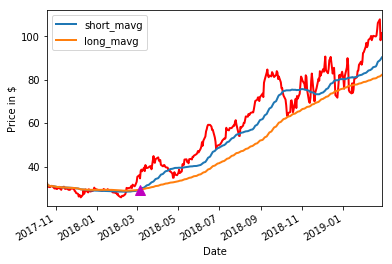

In [307]:
# Initialize the plot figure
fig = plt.figure()

# Add a subplot and label for y-axis
ax1 = fig.add_subplot(111,  ylabel='Price in $')

# Plot the closing price
stock['Close'].plot(ax=ax1, color='r', lw=2.)

# Plot the short and long moving averages
signals[['short_mavg', 'long_mavg']].plot(ax=ax1, lw=2.)

# Plot the buy signals
ax1.plot(signals.loc[signals.positions == 1.0].index, 
         signals.short_mavg[signals.positions == 1.0],
         '^', markersize=10, color='m')
         
# Plot the sell signals
ax1.plot(signals.loc[signals.positions == -1.0].index, 
         signals.short_mavg[signals.positions == -1.0],
         'v', markersize=10, color='k')
         
# Show the plot
plt.show()